### Simple Linear Regression

##### The formula for simple linear regression is 
#### y=mx+b
##### where 
##### y is dependent variable 
##### m is the slop 
##### x is the independent variable
##### b is the intercept

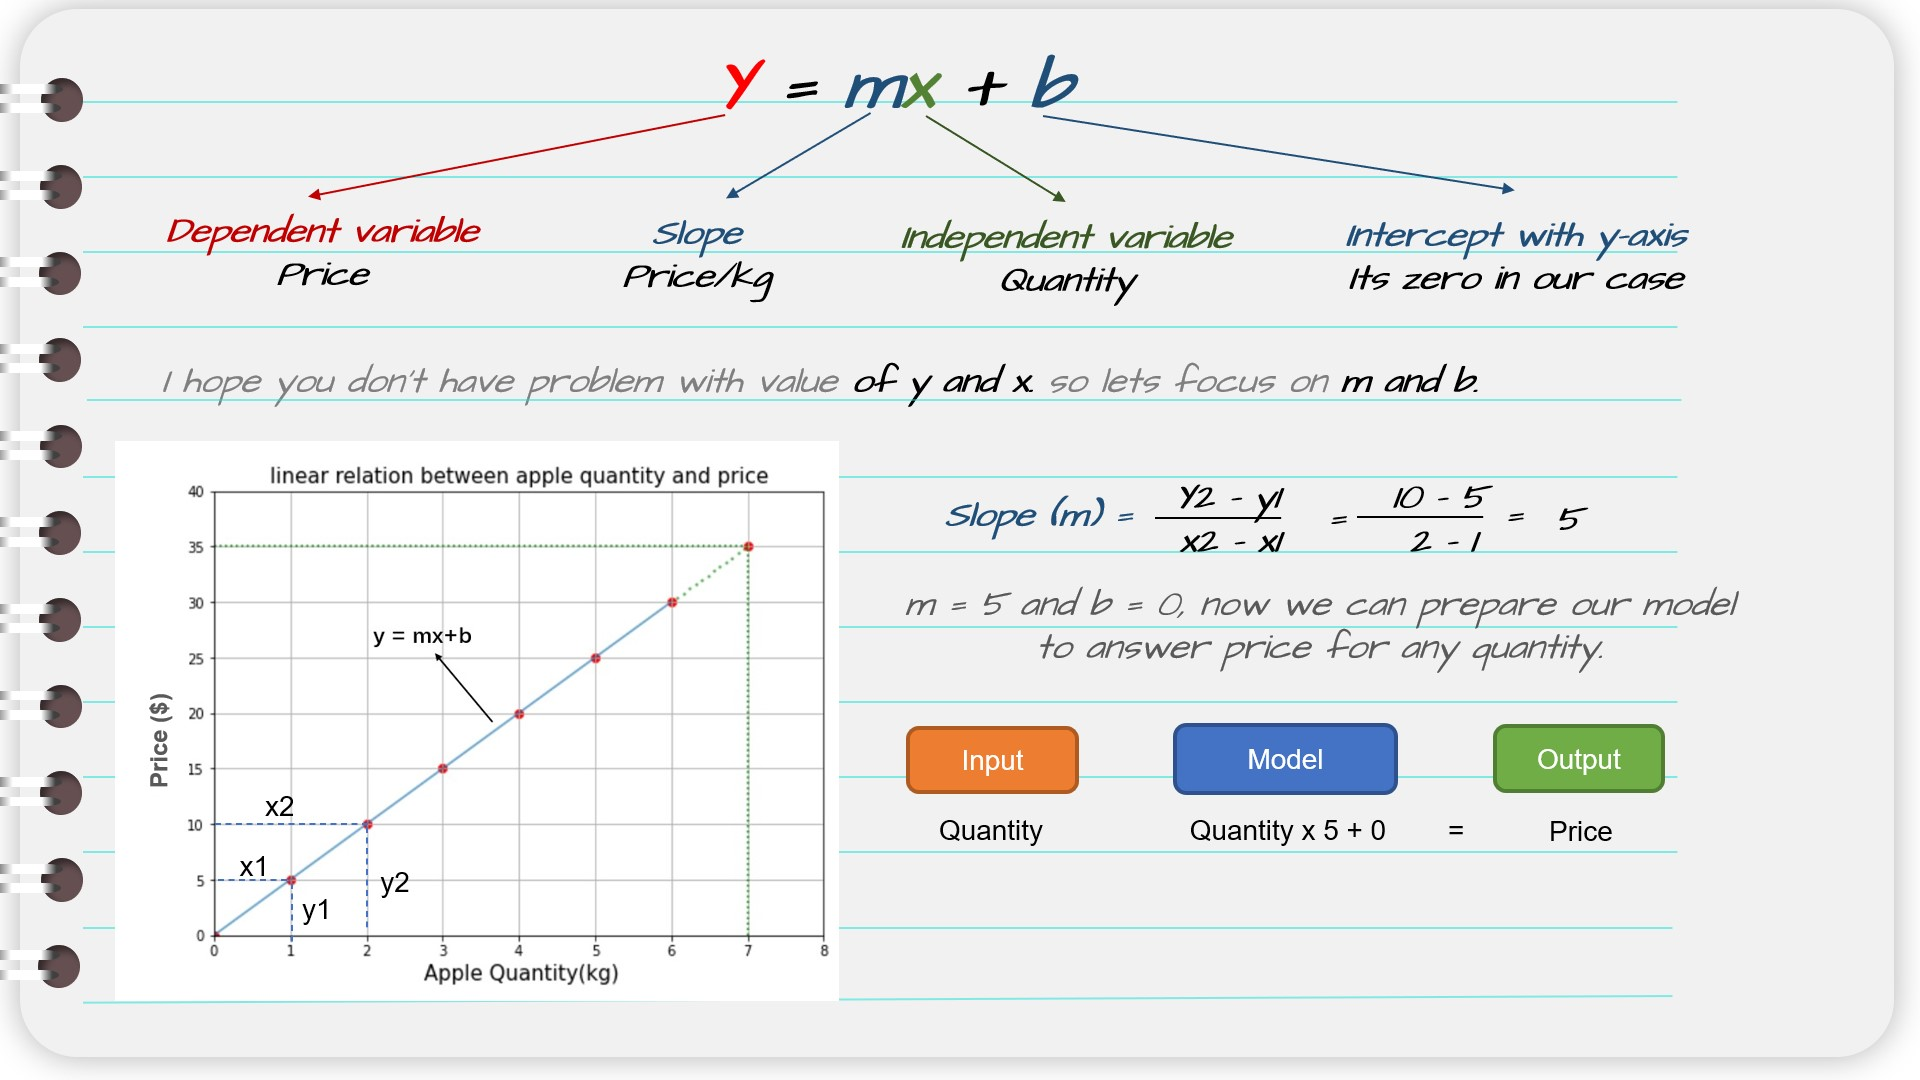

##### We are going to predict the salary on the basis of experience where salary is dependent variable and experience is independent variable

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('D:\DS ML algorithm\Salary_Data.csv')

In [3]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [5]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


##### Dividing col into x and y 

In [6]:
x=df.iloc[:,:-1].values
y=df.iloc[:,1:].values

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=scaler.fit_transform(x)

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=0)

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
lr=LinearRegression()

In [10]:
lr.fit(x_train,y_train)

LinearRegression()

In [11]:
lr.intercept_

array([76474.29975849])

In [12]:
lr.coef_

array([[26076.94730646]])

In [13]:
y_pred=lr.predict(x_test)

In [14]:
y_pred

array([[ 40835.10590871],
       [123079.39940819],
       [ 65134.55626083],
       [ 63265.36777221],
       [115602.64545369],
       [108125.8914992 ],
       [116537.23969801],
       [ 64199.96201652],
       [ 76349.68719258],
       [100649.1375447 ]])

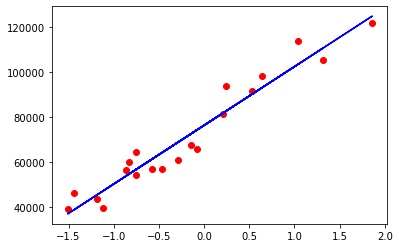

In [15]:
# Visualising the Training set results
plt.scatter(x_train, y_train, color = 'red')
plt.plot(x_train, lr.predict(x_train), color = 'blue')

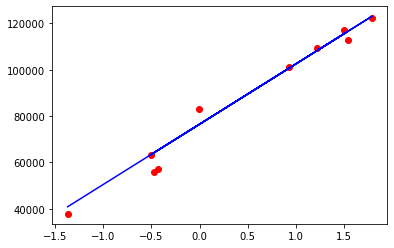

In [16]:
# Visualising the Training set results
plt.scatter(x_test, y_test, color = 'red')
plt.plot(x_test, lr.predict(x_test), color = 'blue')

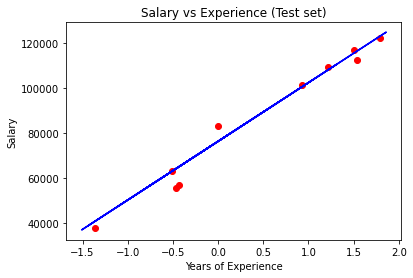

In [17]:
# Visualising the Test set results
plt.scatter(x_test, y_test, color = 'red')
plt.plot(x_train, lr.predict(x_train), color = 'blue')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

##### Salary of a 2 year experienced candidate after prediction is 

In [18]:
#x_test=x_test.reshape(-1,1)
y_pred_val=lr.predict([[2]])
y_pred_val

array([[128628.19437142]])

##### The salary would be 128628.19 some changes as per our records or data

In [19]:
from sklearn import metrics

In [23]:
# Mean Absolute Error
print(metrics.mean_absolute_error(y_test,lr.predict(x_test)))

# Mean Square Error
print(metrics.mean_squared_error(y_test,lr.predict(x_test)))

# Root Mean Square Error
print(np.sqrt(metrics.mean_squared_error(y_test,lr.predict(x_test))))

#R2
print(metrics.r2_score(y_test,lr.predict(x_test))*100)

3426.4269374307087
21026037.32951129
4585.415720467588
97.49154407708353


##### Mean square error and Root mean square error both are same that Means square error is sufficient to reduce the error of the data.

#### For overfitting and underfitting

#### over fitting- 
when training dataset model gives low error but in test dataset it gives high error 

#### under fitting- 
for training dataset model gives high error and test datset also gives high error

#### for generalised model, 
our model should have low bias and low variance to reduce error in the model

To make generalised model we need to focus on Ridge and Lasso regression



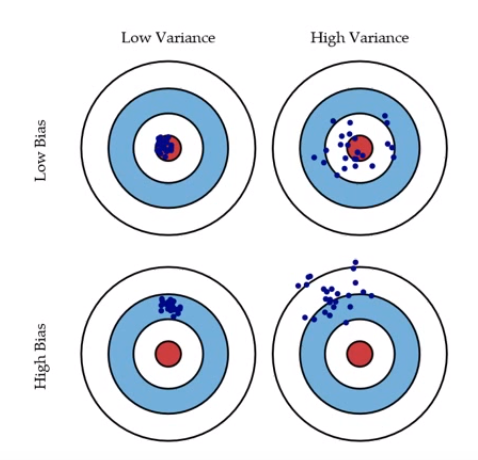

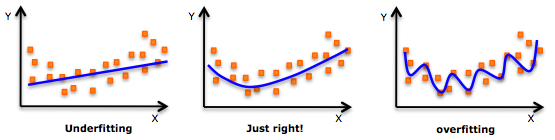

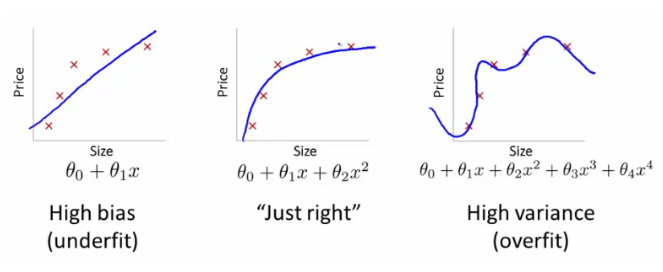

##### Regularization

Why need to study regularization?
In regularization, what we do is normally we keep the same number of features, but reduce the magnitude of the coefficients j.

#### Ridge and Lasso Regression

##### Ridge Regression (L2 Regularization)
we are adding lambda * (slop)^2 with cost function

= E(y-y')^2 + lambda * (slop)^2

##### Lasso Regression (L1 Regularization)
= E(y-y')^2 + lambda * |slop|
